# CROP PRODUCTION PREDICTION USING LINEAR REGRESSION

### IMPORTING LIBRARIES FOR ML

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#overwriting sns 
sns.set()

### LOADING AND CLEANING DATA SET

In [2]:
#enter dataset
dataset = pd.read_csv("out.csv", index_col ="Crop")
#print(dataset.head(5))
#print(dataset.shape)

# to extract important crops
imp_rows = dataset.loc[["Rice","Maize","Moong(Green Gram)","Urad","Sesamum","Coconut","Wheat"]]
#print(imp_rows)

# drop or delete the unnecessary columns in the data. 
clean_data_1 = imp_rows.drop(['State','Year','Index'], axis = 1) 
print(clean_data_1)
clean_data_1.to_csv('random_forest_test_final.csv')

#enter dataset
dataset_new_1 = pd.read_csv("random_forest_test_final.csv")
#print(dataset_new_1.shape)
dataset_new = dataset_new_1.dropna()
#print(dataset_new.head(10))
#print(dataset_new.shape)

#to check data types
dataset_new['Season'] = dataset_new['Season'].astype(str) 
data_type = dataset_new.dtypes
print(data_type)

#frequency count
count = dataset_new_1['Season'].value_counts()
print(count)

# mapping categories with 01234...
data_copy = dataset_new.copy()
data_copy['Crop'] = data_copy['Crop'].map({'Rice':6,'Maize':5,'Moong(Green Gram)':4,'Urad':3,'Sesamum':2,'Coconut':1,'Wheat':0})
data_copy['Season'] = data_copy['Season'].map({'Kharif':6,'Rabi':5,'Winter':4,'Summer':3,'Autumn':2,'Whole Year':1})

print(data_copy.head(10))
data_copy.describe()

C:\Users\DEEP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import sys


            Season      Area  Production  Rainfall
Crop                                              
Rice   Kharif         102.00      321.00    2763.2
Rice   Kharif          83.00      300.00    3080.9
Rice   Kharif         189.20      510.84    2620.2
Rice   Kharif          52.00       90.17    2355.9
Rice   Kharif          52.94       72.57    2460.1
...            ...       ...         ...       ...
Wheat  Rabi         12126.00    20489.00    1424.0
Wheat  Rabi         11503.00    18907.00    1564.7
Wheat  Rabi         10584.00    18387.00    1223.9
Wheat  Rabi         10023.00    17874.00    1735.4
Wheat  Rabi          9961.00    13643.00    1287.4

[22715 rows x 4 columns]
Crop           object
Season         object
Area          float64
Production    float64
Rainfall      float64
dtype: object
Kharif         9084
Summer         3866
Rabi           3728
Autumn         2738
Winter         2643
Whole Year      655
Name: Season, dtype: int64
   Crop  Season      Area  Production  R

C:\Users\DEEP\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Crop,Season,Area,Production,Rainfall
count,22714.000000,0.0,22714.000000,2.271400e+04,22714.000000
mean,3.880602,NaN,20757.648411,4.717063e+04,1297.327468
std,1.916431,NaN,49828.552053,1.497862e+05,518.666966
min,0.000000,NaN,0.280000,2.000000e-02,274.700000
25%,3.000000,NaN,182.000000,1.004000e+02,1052.800000
50%,4.000000,NaN,1806.000000,1.347000e+03,1278.700000
75%,6.000000,NaN,13725.250000,1.923725e+04,1484.300000
max,6.000000,NaN,687000.000000,1.969000e+06,3616.700000


### SCATTER PLOT AND HEAT MAPFOR PATTERN ANALYSIS

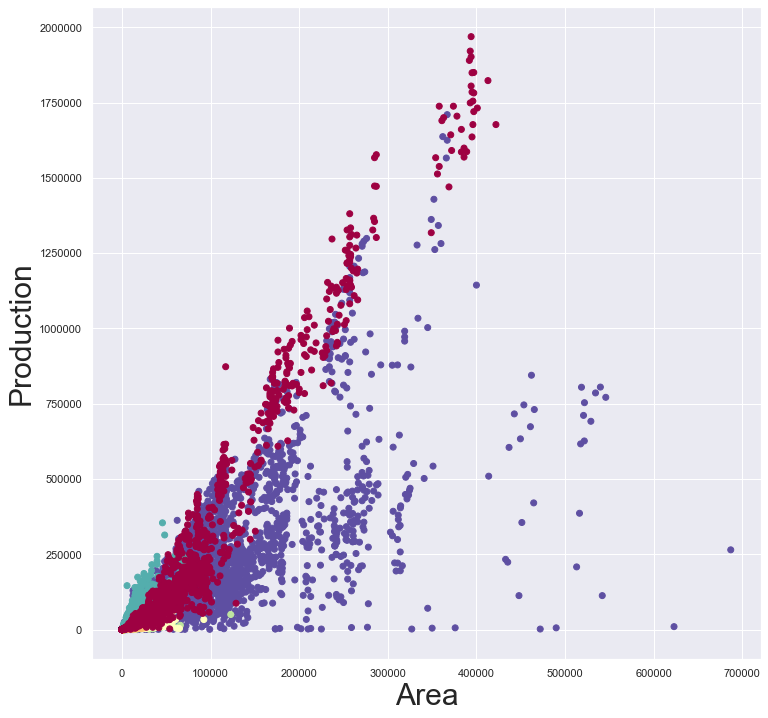

In [3]:
# scatterplot with categorical variable
plt.figure(figsize=(12,12))
plt.scatter(data_copy['Area'],data_copy['Production'], c=data_copy['Crop'],cmap='Spectral')
plt.xlabel('Area', fontsize = 30)
plt.ylabel('Production', fontsize = 30)
plt.show()

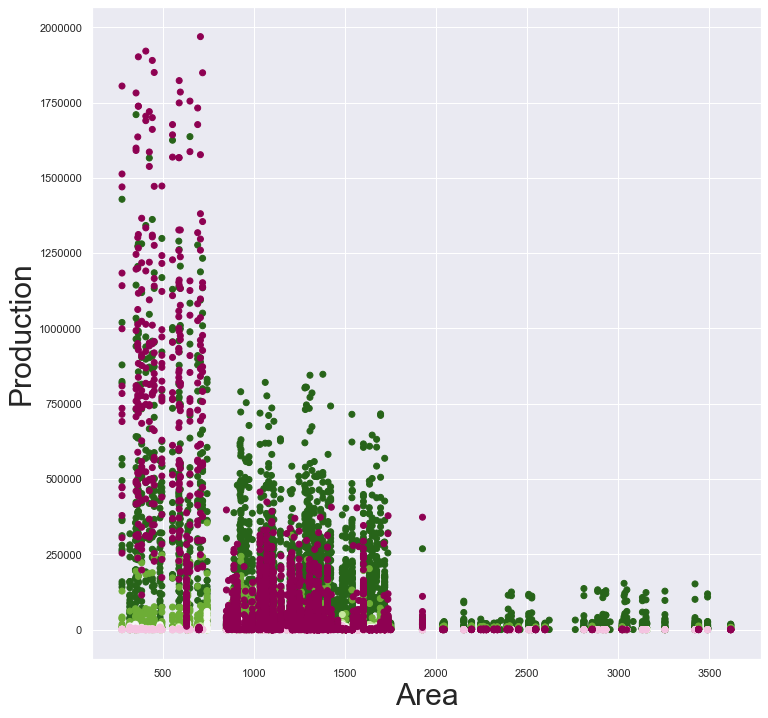

In [4]:

# scatterplot with categorical variable
plt.figure(figsize=(12,12))
plt.scatter(data_copy['Rainfall'],data_copy['Production'], c=data_copy['Crop'],cmap='PiYG')
plt.xlabel('Area', fontsize = 30)
plt.ylabel('Production', fontsize = 30)
plt.show()

C:\Users\DEEP\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


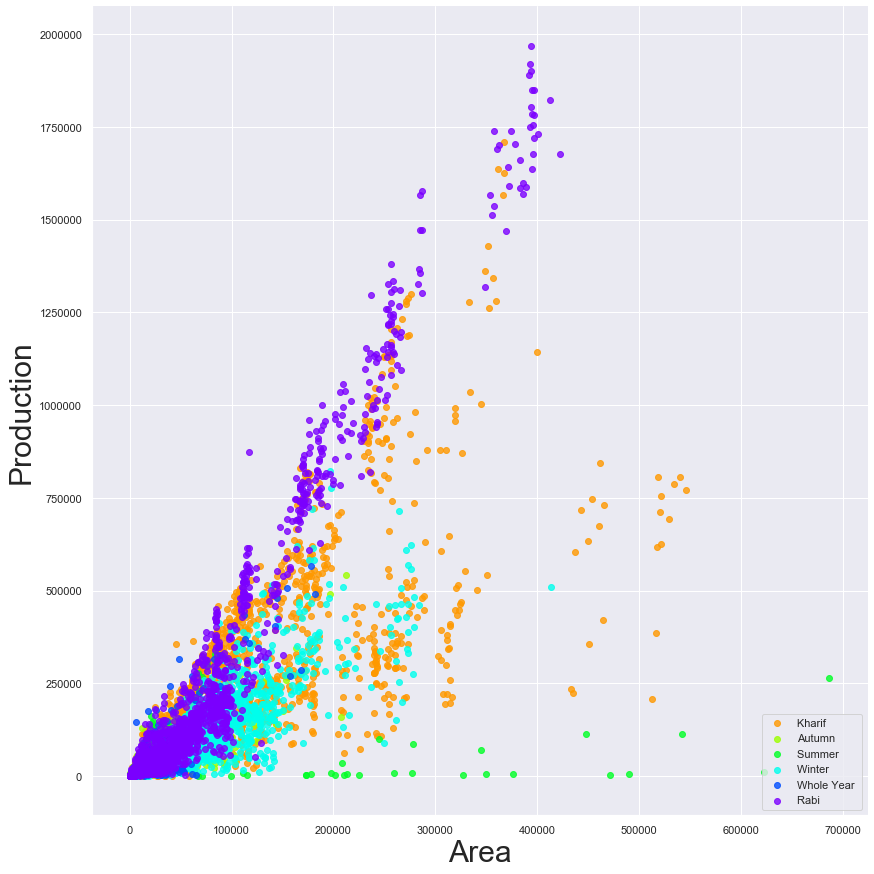

In [5]:
# scatterplot with categorical variable

#fig_dims = (10, 10)
#fig, ax = plt.subplots(figsize=fig_dims)
sns.lmplot( x="Area", y="Production", data=dataset_new, fit_reg=False, hue='Season',palette="gist_rainbow", 
           legend=False, size = 12, height = 5) 
plt.xlabel('Area', fontsize = 30)
plt.ylabel('Production', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()


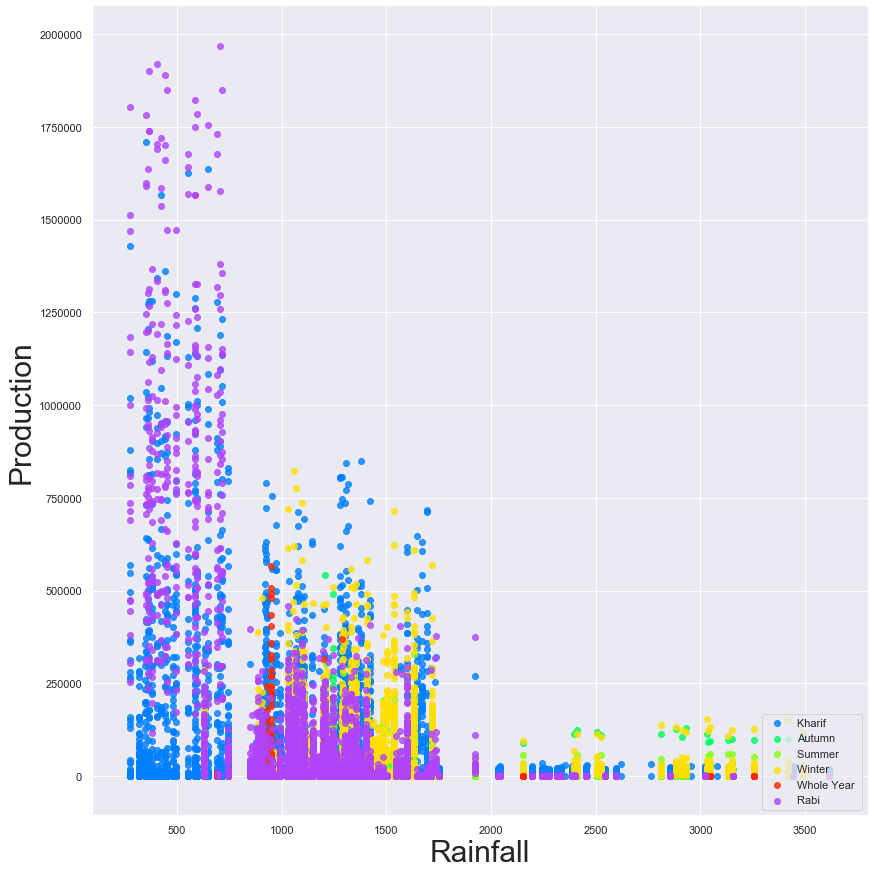

In [6]:

# scatterplot with categorical variable
sns.lmplot( x="Rainfall", y="Production", data=dataset_new, fit_reg=False, hue='Season',palette="gist_ncar", 
           legend=False, size = 12)
plt.xlabel('Rainfall', fontsize = 30)
plt.ylabel('Production', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()

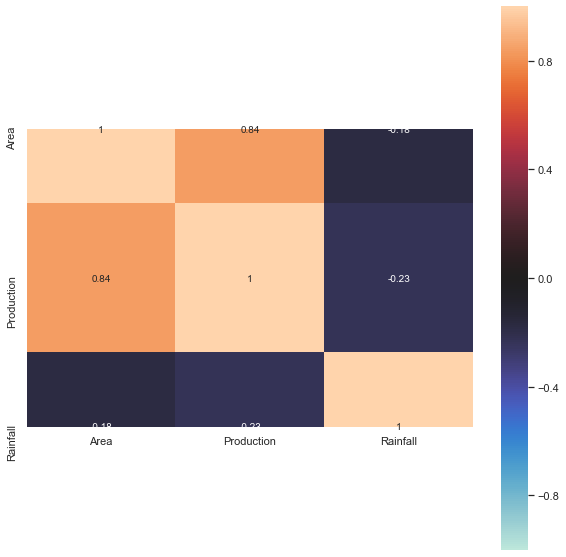

In [7]:
plt.figure(figsize=(10,10))
# correlation and heat maps for the data
correlation = clean_data_1.corr()

ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0, annot=True,
    square=True
)

### REGRESSION ANALYSIS

In [8]:
#test regression 

yt = data_copy['Production']
xt = data_copy[['Crop','Area','Rainfall']]

# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(xt)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(yt,x).fit()
# Print a nice summary of the regression.
results.summary()

C:\Users\DEEP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Production   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 2.012e+04
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:15:51   Log-Likelihood:            -2.8818e+05
No. Observations:               22714   AIC:                         5.764e+05
Df Residuals:                   22710   BIC:                         5.764e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.099e+04   1720.171     29.645      0.000    4.76e+04    5.44e+04
Crop       -7565.3324    274.312    -27.579      0.000   -8103.002   -7027.663
Area           2.5253      0.011    236.478      0.000       2.504       2.546
Rainfall     -20.7237      1.025    -20.220      0.000     -22.733     -18.715
==============================================================================
Omnibus:                     7761.000   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2698538.612
Skew:                           0.163   Prob(JB):                         0.00
Kurtosis:                      56.397   Cond. No.                     1.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### FINAL REGRESSION PLOT

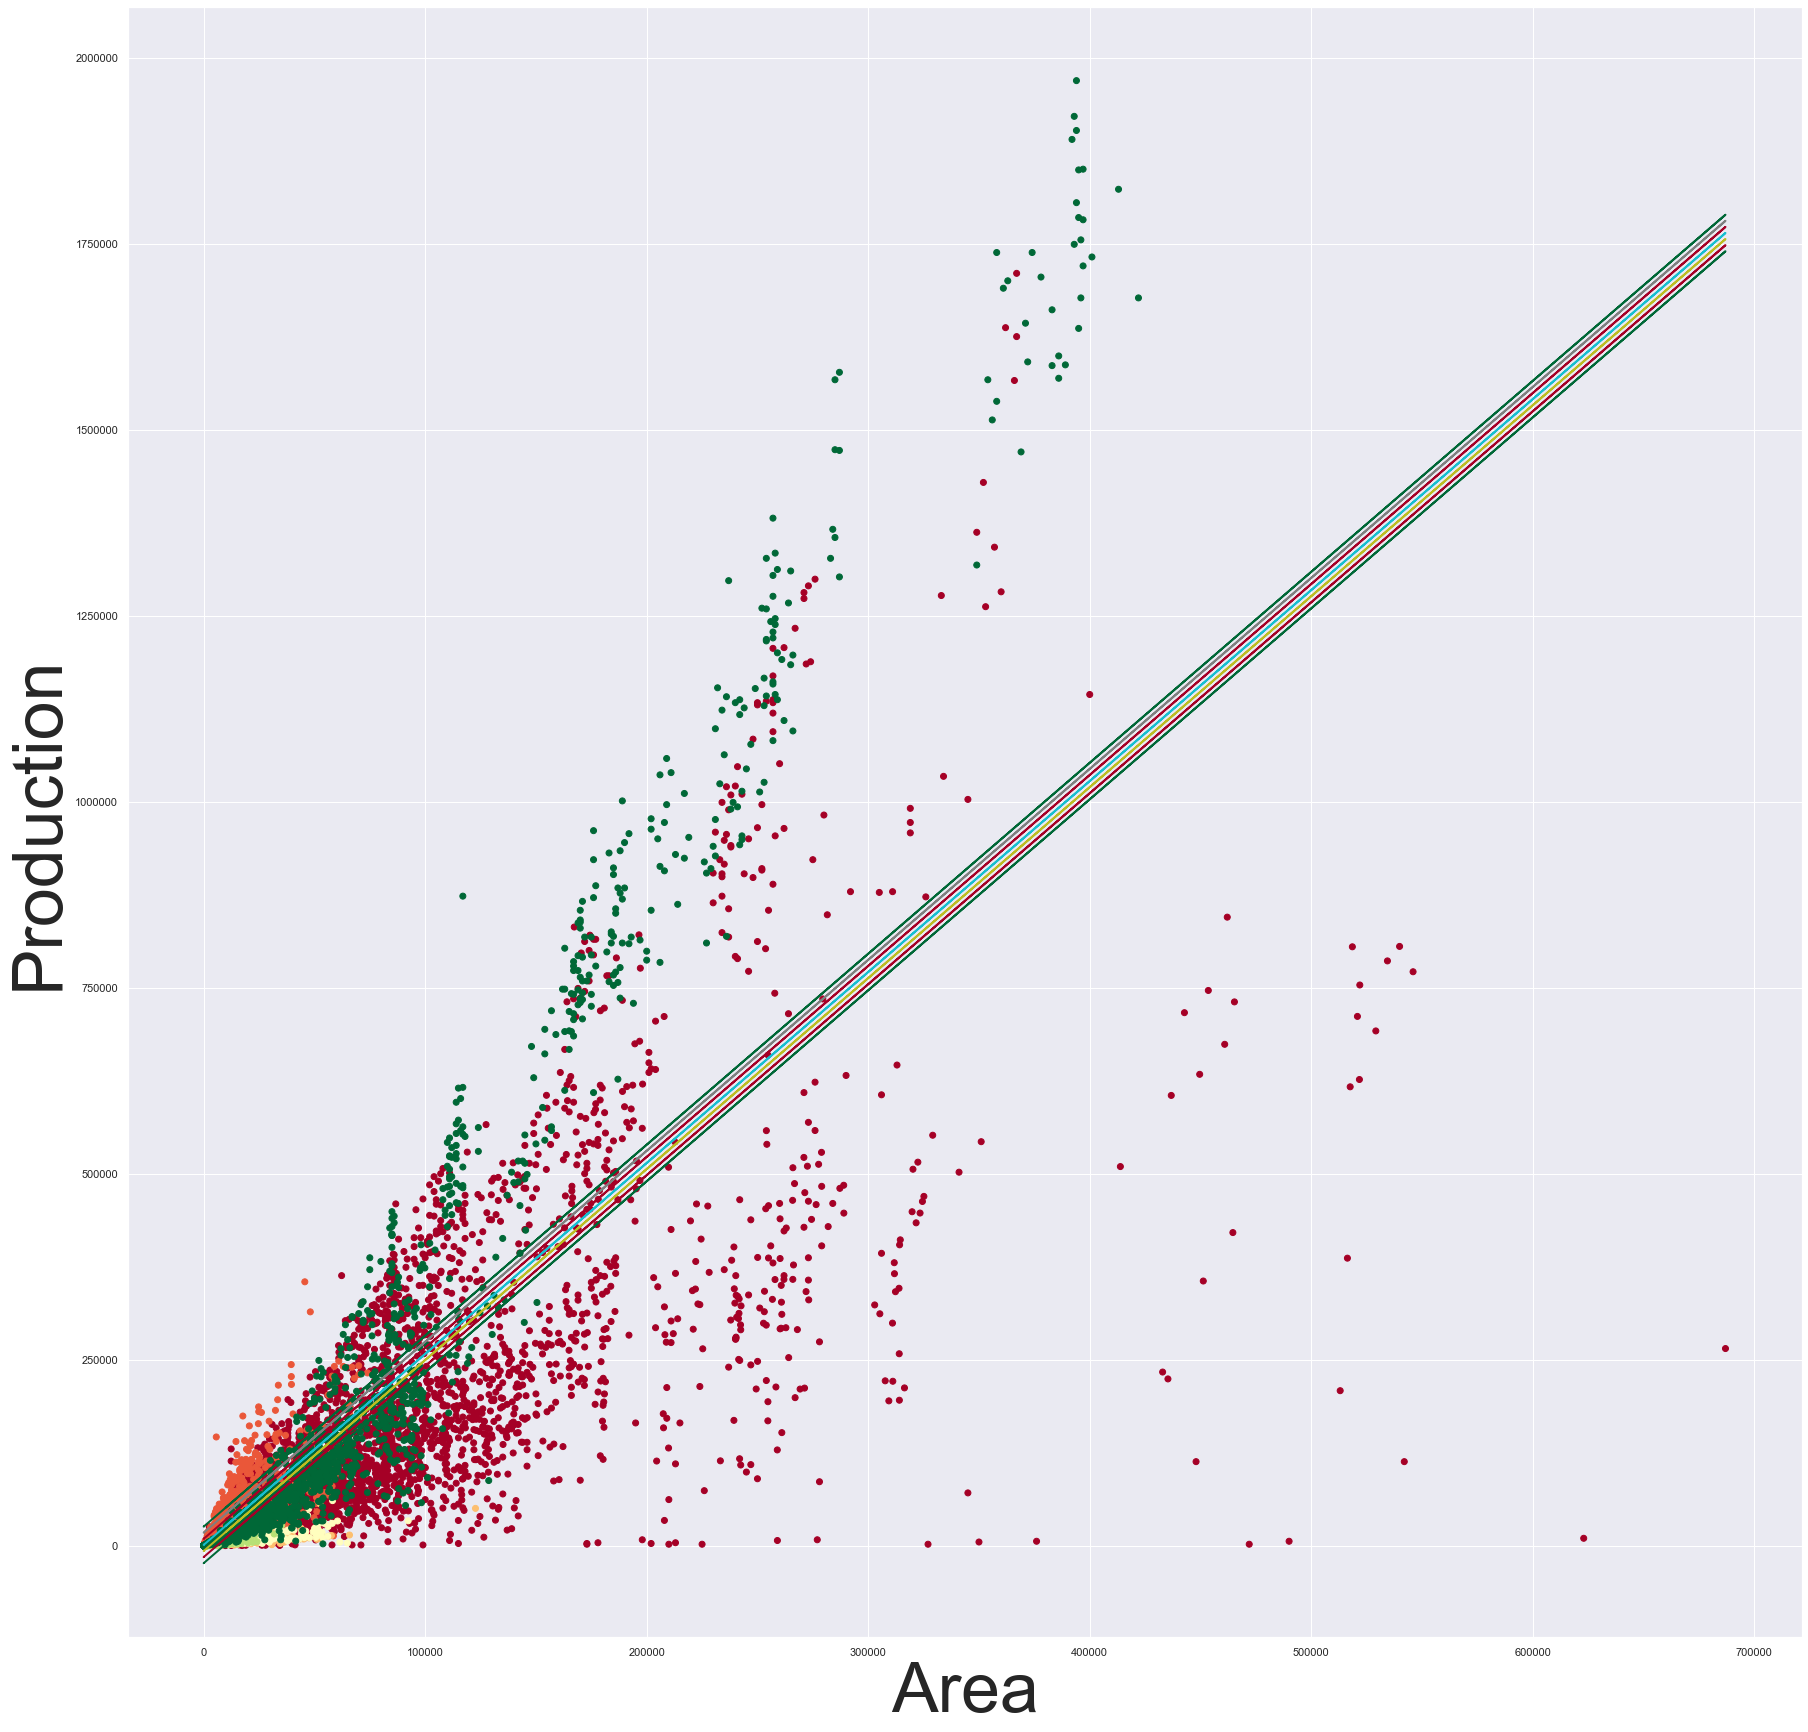

In [9]:
plt.rcParams["figure.figsize"] = (30, 30)

# Create a scatter plot of production and crops
plt.scatter(data_copy['Area'],data_copy['Production'], c=data_copy['Crop'],cmap='RdYlGn_r')

# Define the two regression equations, depending on whether they attended (yes), or didn't (no)
yhat_rice =  2.566e+04 + 2.5664*data_copy['Area'] - 49114.1628
yhat_maize = 2.566e+04 + 2.5664*data_copy['Area'] - 40928.469
yhat_moong = 2.566e+04 + 2.5664*data_copy['Area'] - 32742.7752
yhat_urad = 2.566e+04 + 2.5664*data_copy['Area'] - 24557.0814
yhat_sesamum = 2.566e+04 + 2.5664*data_copy['Area'] - 16371.3876
yhat_coconut = 2.566e+04 + 2.5664*data_copy['Area'] - 8185.6938 
yhat_wheat = 2.566e+04 + 2.5664*data_copy['Area']

# Plot the all regression lines
fig = plt.plot(data_copy['Area'],yhat_rice, lw=2, c='#006837')
fig = plt.plot(data_copy['Area'],yhat_maize, lw=2, c='#a50026')
fig = plt.plot(data_copy['Area'],yhat_moong, lw=2, c='#bcbd22')
fig = plt.plot(data_copy['Area'],yhat_urad, lw=2, c='#17becf')
fig = plt.plot(data_copy['Area'],yhat_sesamum, lw=2, c='#a50026')
fig = plt.plot(data_copy['Area'],yhat_coconut, lw=2, c='#7f7f7f')
fig = plt.plot(data_copy['Area'],yhat_wheat, lw=2, c='#006837')
# Name your axes :)
plt.xlabel('Area', fontsize = 70)
plt.ylabel('Production', fontsize = 70)
plt.show()



### PREDICTION AND FITTING ALGORITHM TO DATASET

       Index                        State  Year       Season      Area  \
Crop                                                                     
Rice       2  Andaman and Nicobar Islands  2000  Kharif         102.00   
Rice      12  Andaman and Nicobar Islands  2001  Kharif          83.00   
Rice      18  Andaman and Nicobar Islands  2002  Kharif         189.20   
Rice      27  Andaman and Nicobar Islands  2003  Kharif          52.00   
Rice      36  Andaman and Nicobar Islands  2004  Kharif          52.94   
...      ...                          ...   ...          ...       ...   
Rice  236383                  Uttarakhand  2011  Kharif       10619.00   
Rice  236407                  Uttarakhand  2012  Kharif        9919.00   
Rice  236428                  Uttarakhand  2013  Kharif        9010.00   
Rice  236454                  Uttarakhand  2014  Kharif        9919.00   
Rice  236475                  Uttarakhand  2014  Whole Year    9919.00   

      Production  Rainfall  
Crop    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

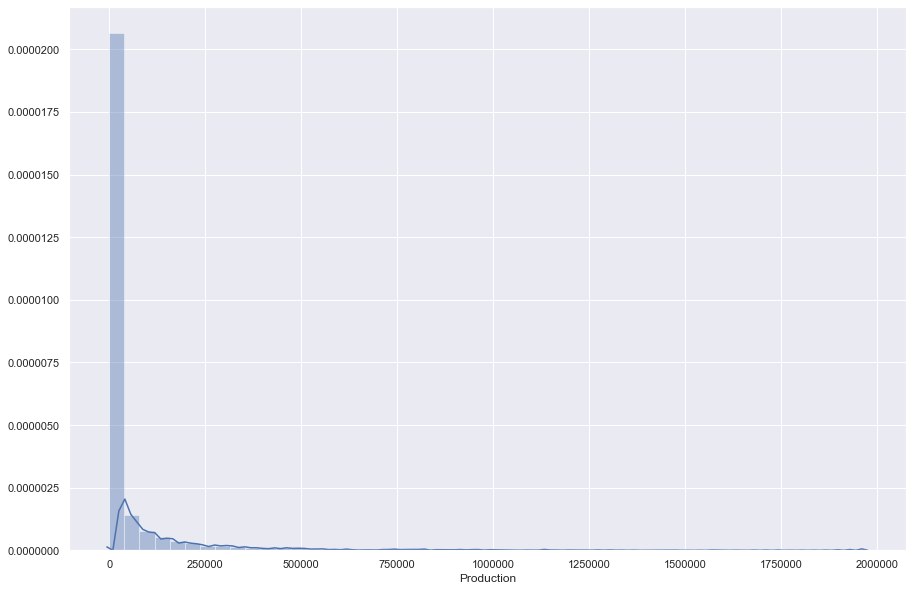

In [10]:
#prediction for rice
rice_pre = dataset.loc[["Rice"]]
print(rice_pre)

# seperating attributes and labels
X = rice_pre[['Area','Rainfall']].values
Y = rice_pre['Production'].values
print(X)
print(Y)

# checking avg of rainfall column
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset_new['Production'])

#splitting data set in two parts 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

#training the model by regression algo
reg_data = LinearRegression()
reg_data.fit(X_train, Y_train)

### PREDICTION RESULTS AND ANALYSIS

In [11]:
# finding coeff of the corresponding input.....B1,B2,B3,B4
coeff_data = pd.DataFrame(reg_data.coef_)
print(coeff_data)

#prediction using test data set
Y_prediction = reg_data.predict(X_test)

#comparing actual and predicted data
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_prediction.flatten()})
print(df)


           0
0   1.882672
1 -30.456584
        Actual      Predicted
0        192.0   11017.045900
1      70708.0  148167.049666
2     295392.0  194194.827072
3     129942.0  185150.092247
4        887.0   21104.184897
...        ...            ...
1154  285510.0  338226.951525
1155  152083.0  157910.448696
1156    9263.0   34757.977585
1157    6210.0  -34105.033355
1158      70.0   17234.788969

[1159 rows x 2 columns]


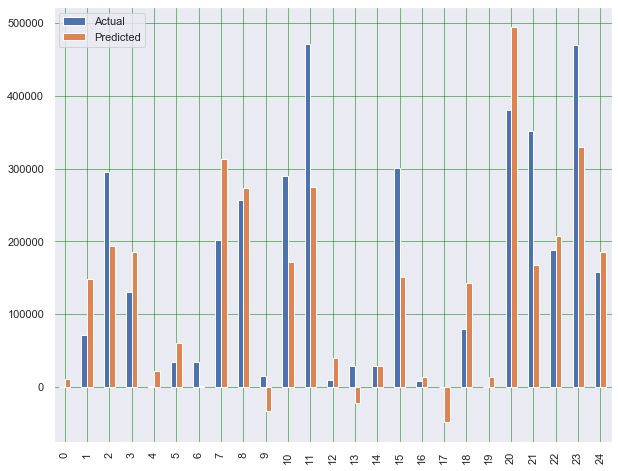

In [12]:
# graphical comparision of predicted and actual
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

        Index              State  Year       Season     Area  Production  \
Crop                                                                       
Wheat    9834  Arunachal Pradesh  2004  Rabi            30.0        60.0   
Wheat    9843  Arunachal Pradesh  2005  Rabi            32.0        65.0   
Wheat    9852  Arunachal Pradesh  2006  Rabi            34.0        73.0   
Wheat    9862  Arunachal Pradesh  2007  Rabi            30.0        48.0   
Wheat    9872  Arunachal Pradesh  2008  Rabi            30.0        49.0   
...       ...                ...   ...          ...      ...         ...   
Wheat  236372        Uttarakhand  2010  Rabi         12126.0     20489.0   
Wheat  236395        Uttarakhand  2011  Rabi         11503.0     18907.0   
Wheat  236417        Uttarakhand  2012  Rabi         10584.0     18387.0   
Wheat  236440        Uttarakhand  2013  Rabi         10023.0     17874.0   
Wheat  236470        Uttarakhand  2014  Rabi          9961.0     13643.0   

       Rain

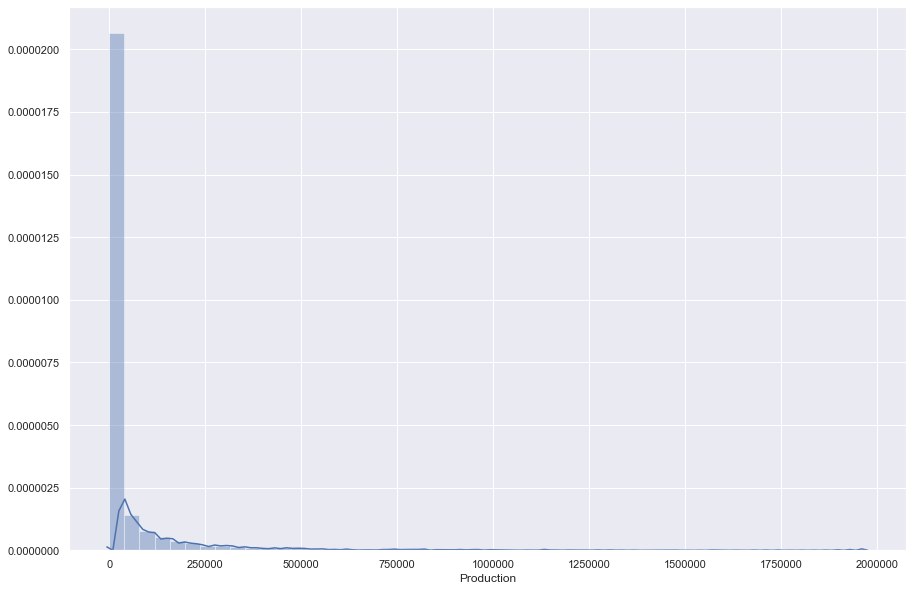

In [13]:
#prediction for rice
rabi_pre = dataset.loc[["Wheat"]]
print(rabi_pre)

# seperating attributes and labels
X = rabi_pre[['Area','Rainfall']].values
Y = rabi_pre['Production'].values
print(X)
print(Y)

# checking avg of rainfall column
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset_new['Production'])

In [22]:
#splitting data set in two parts 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
#print(X_train)
#print(X_test)

#training the model by regression algo
reg_data = LinearRegression()
reg_data.fit(X_train, Y_train)

# finding coeff of the corresponding input.....B1,B2,B3,B4
coeff_data = pd.DataFrame(reg_data.coef_)
print(coeff_data)

#prediction using test data set
Y_prediction = reg_data.predict(X_test)

#comparing actual and predicted data
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_prediction.flatten()})
print(df)



          0
0  4.358652
1  7.331057
       Actual      Predicted
0     45430.0  138124.872725
1    538000.0  445784.189336
2        82.0  -44024.399387
3    167720.0  253025.171521
4     29105.0  103674.801581
..        ...            ...
254  159300.0  365187.932640
255      64.4  -43871.500443
256    5588.0  -30107.603330
257  314201.0  366603.643866
258  121351.0   95082.772721

[259 rows x 2 columns]


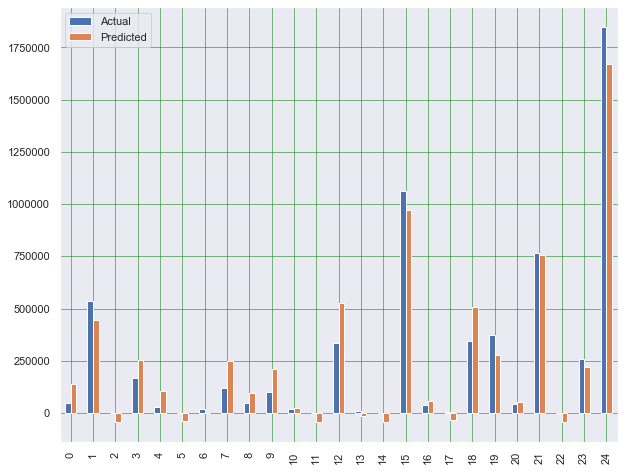

In [15]:

# graphical comparision of predicted and actual
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [16]:
x

,const,Crop,Area,Rainfall
0,1.0,6,102.00,2763.2
1,1.0,6,83.00,3080.9
2,1.0,6,189.20,2620.2
3,1.0,6,52.00,2355.9
4,1.0,6,52.94,2460.1
...,...,...,...,...
22710,1.0,0,12126.00,1424.0
22711,1.0,0,11503.00,1564.7
22712,1.0,0,10584.00,1223.9
22713,1.0,0,10023.00,1735.4


In [34]:
#creating new data frame, identical in organization x

new_data = pd.DataFrame({'const':1,'Crop':[6,5,4,6,0,1,2,3,6,5],'Area':[500,2000,500,1500,3500,5000,5500,9000,10000,12200],
                         'Rainfall':[2700,3000,3000,3000,2000,2000,2000,1000,1000,2500]})
new_data = new_data[['const','Crop','Area','Rainfall']]
print('The input dataset to be predicted:\n',new_data)

The input dataset to be predicted:
    const  Crop   Area  Rainfall
0      1     6    500      2700
1      1     5   2000      3000
2      1     4    500      3000
3      1     6   1500      3000
4      1     0   3500      2000
5      1     1   5000      2000
6      1     2   5500      2000
7      1     3   9000      1000
8      1     6  10000      1000
9      1     5  12200      2500


### SUMMARY AND MODEL RESULTS IN TERMS OF P VALUE AND REGRESSION ACCURACY

In [26]:
# We start by creating a linear regression object
reg = LinearRegression()

# The whole learning process boils down to fitting the regression
reg.fit(xt,yt)

# Getting the coefficients of the regression
print(reg.coef_)
# Note that the output is an array

# Getting the intercept of the regression
print(reg.intercept_)
# Note that the result is a float as we usually expect a single value

# Get the R-squared of the regression
print('Regression score of this model is:', reg.score(xt,yt)*100)

[-7.56533242e+03  2.52532300e+00 -2.07237315e+01]
50994.3732958932
Regression score of this model is: 72.66126885349416


In [32]:
#result predictions
predictions = results.predict(new_data)
prod_final = abs(predictions)
print('The predicted values of the rainfall based on above dataset are:\n',prod_final)

The predicted values of the rainfall based on above dataset are:
 0    49089.034861
1    43952.837408
2    40175.489491
3    52780.831324
4    18385.540712
5    14608.192795
6     8305.521878
7    30302.551501
8    10131.877253
9     7832.677044
dtype: float64


In [20]:
from sklearn.feature_selection import f_regression
f_regression(xt,yt)
p_values = f_regression(xt,yt)[1]
print(p_values.round())

[0. 0. 0.]


In [33]:
reg_summary = pd.DataFrame(data = xt.columns.values, columns=['Features'])
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
print('The summary of regression model and parameters:\n',reg_summary)

The summary of regression model and parameters:
    Features  Coefficients  p-values
0      Crop  -7565.332416     0.007
1      Area      2.525323     0.000
2  Rainfall    -20.723732     0.000
